## Exercise: Try different MLP architectures on MNIST dataset.

### Step By Step Process
- Lets start working on this Assignents and as we know our main objective in assignment to implemants Multi Layer Perceptron using Keras on MNIST Dataset And in this we will work with Multi Layer Perceptron and also MLP with Dropout and Batch Normalization.

1. First we will start with importing multiple important librarues with is being used in this assignments and after that we will load our MNIST Dataset.
2. After loading MNIST Dataset with 100000 data points and then we will split our dataset into train and test and we know our dataset i.e image is in the shape of (28 X 28) so we will first reshape our dataset i.e we will convert the (28*28) vector into single dimensional vector of 1 * 784  .
3. Now in this step we will do data point normlization and as we observe the our data in which each cell is having a value between 0-255 so before we move to apply machine learning algorithms lets try to normalize the data.
4. And as we know our class lables in this dataset is in numbers between {0,1,2,3......9} and now we will convert it into one hot encoded vector
5. After doing all above now we will start working with our models in this we will work with softmax classifier with multiple hidden layers that means we will works with softmax with multiple hidden layers and try to observe the performance by changing the no of layers and in this we will also work with dropout and batch normalization.
6. And after doing all this we will try to observe the performance of train and test val so that we will be able to know our model should not overfit. 


    

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

# importing other lib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time


C:\Users\nisha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
def plt_dynamic_model(x, vy, ty):
    plt.figure(figsize=(10,5))
    plt.plot(x, vy, 'b', label="val Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.xlabel('Epochs val') 
    plt.ylabel('Categorical Crossentropy Loss')
    plt.title('\nCategorical Crossentropy Loss VS Epochs')
    plt.legend()
    plt.show()

### Loading MNIST Dataset
- And then spliting it into train and test

In [2]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Number of training examples:",X_train.shape[0],"and each image is of shape (%d, %d)"%(X_train.shape[1],X_train.shape[2]))
print("Number of training examples :",X_test.shape[0],"and each image is of shape (%d, %d)"%(X_test.shape[1],X_test.shape[2]))

Number of training examples: 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [3]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [4]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### Data point normlization

In [5]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### Converting class lables into One hot Encoded 
- As we know our class lables in this dataset is in numbers between {0,1,2,3......9} and now we will convert it into one hot encoded vector 

In [6]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


######################################################################################################################

In [31]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## 1. Softmax classifier with 2-hidden layers Without dropout and Batch Normalization

In [8]:
model2 = Sequential()

model2.add(Dense(385, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model2.add(Dense(120, activation='relu', kernel_initializer=he_normal(seed=None)))
model2.add(Dense(output_dim, activation='softmax'))

# model Summary
print("Model Summary :- \n",model2.summary())

# Compiling the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 385)               302225    
_________________________________________________________________
dense_5 (Dense)              (None, 120)               46320     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1210      
Total params: 349,755
Trainable params: 349,755
Non-trainable params: 0
_________________________________________________________________
Model Summary :- 
 None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2441 - acc: 0.9290 - val_loss: 0.1123 - val_acc: 0.9653
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0918 - acc: 0.9718 - val_loss: 0.0919 - val_acc: 0.9717
Epoch 3/20
60000/60000 [==========================

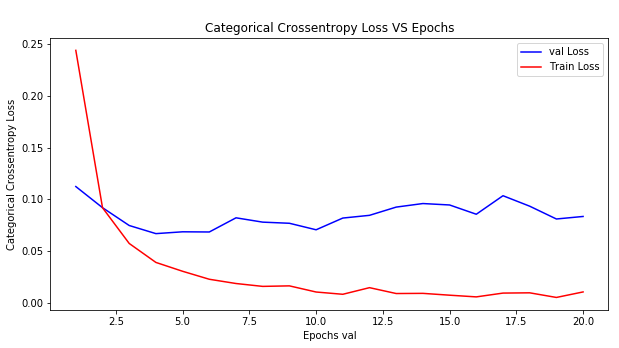

Test score: 0.08338531920399564
Test accuracy: 0.982


In [22]:
x = list(range(1,nb_epoch+1))

# getting Val loss
vy = history2.history['val_loss']
# getting Train loss
ty = history2.history['loss']

# function call 
plt_dynamic_model(x, vy, ty)

# Evaluating the model
model_score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving train and test accuracy of the model
model2_test_acc = model_score[1]
model2_train_acc = history2.history['acc']

### Softmax classifier with 2-hidden layers With dropout and Batch Normalization

In [9]:
model2dn = Sequential()

model2dn.add(Dense(375, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model2dn.add(BatchNormalization())
model2dn.add(Dropout(0.5))

model2dn.add(Dense(112, activation='relu', kernel_initializer=he_normal(seed=None)))
model2dn.add(BatchNormalization())
model2dn.add(Dropout(0.5))

model2dn.add(Dense(output_dim, activation='softmax'))

# model Summary
print("model summary :- \n",model2dn.summary())

# Compiling the model
model2dn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history2dn = model2dn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 375)               294375    
_________________________________________________________________
batch_normalization_1 (Batch (None, 375)               1500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 112)               42112     
_________________________________________________________________
batch_normalization_2 (Batch (None, 112)               448       
_________________________________________________________________
dropout_2 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1130      
Total para

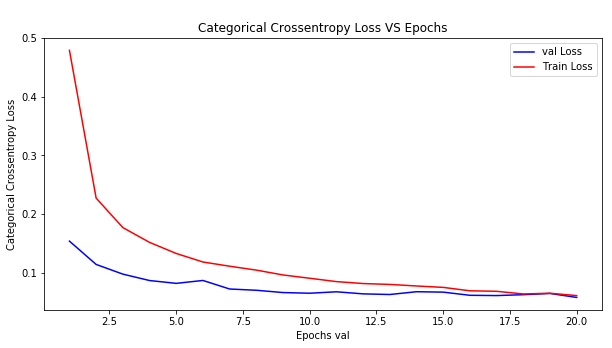

Test score: 0.05833159902372281
Test accuracy: 0.9818


In [23]:
x = list(range(1,nb_epoch+1))

# getting Val loss
vy = history2dn.history['val_loss']
# getting Train loss
ty = history2dn.history['loss']

# function call 
plt_dynamic_model(x, vy, ty)

# Evaluating the model
model_score = model2dn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving train and test accuracy of the model
model2dn_test_acc = model_score[1]
model2dn_train_acc = history2dn.history['acc']

## 2. Softmax classifier with 3-hidden layers Without dropout and Batch Normalization

In [21]:
model3 = Sequential()

model3.add(Dense(465, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model3.add(Dense(141, activation='relu', kernel_initializer=he_normal(seed=None)))
model3.add(Dense(65, activation='relu', kernel_initializer=he_normal(seed=None)))

model3.add(Dense(output_dim, activation='softmax'))

print(model3.summary())
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 465)               365025    
_________________________________________________________________
dense_27 (Dense)             (None, 141)               65706     
_________________________________________________________________
dense_28 (Dense)             (None, 65)                9230      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                660       
Total params: 440,621
Trainable params: 440,621
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.2408 - acc: 0.9295 - val_loss: 0.1255 - val_acc: 0.9601
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - 

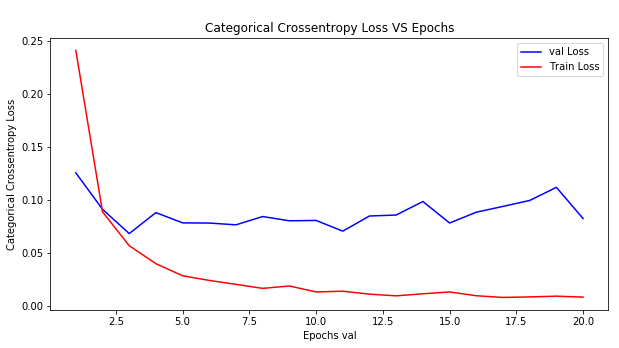

Test score: 0.08253725015399864
Test accuracy: 0.9829


In [24]:
x = list(range(1,nb_epoch+1))

# getting Val loss
vy = history3.history['val_loss']
# getting Train loss
ty = history3.history['loss']

# function call 
plt_dynamic_model(x, vy, ty)

# Evaluating the model
model_score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving train and test accuracy of the model
model3_test_acc = model_score[1]
model3_train_acc = history3.history['acc']

### Softmax classifier with 3-hidden layers With Droput and Batch Normalization

In [10]:
model3dn = Sequential()

model3dn.add(Dense(465, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model3dn.add(BatchNormalization())
model3dn.add(Dropout(0.5))

model3dn.add(Dense(141, activation='relu', kernel_initializer=he_normal(seed=None)))
model3dn.add(BatchNormalization())
model3dn.add(Dropout(0.5))

model3dn.add(Dense(65, activation='relu', kernel_initializer=he_normal(seed=None)))
model3dn.add(BatchNormalization())
model3dn.add(Dropout(0.5))

model3dn.add(Dense(output_dim, activation='softmax'))
print(model3dn.summary())
model3dn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3dn = model3dn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 465)               365025    
_________________________________________________________________
batch_normalization_3 (Batch (None, 465)               1860      
_________________________________________________________________
dropout_3 (Dropout)          (None, 465)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 141)               65706     
_________________________________________________________________
batch_normalization_4 (Batch (None, 141)               564       
_________________________________________________________________
dropout_4 (Dropout)          (None, 141)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 65)                9230      
__________

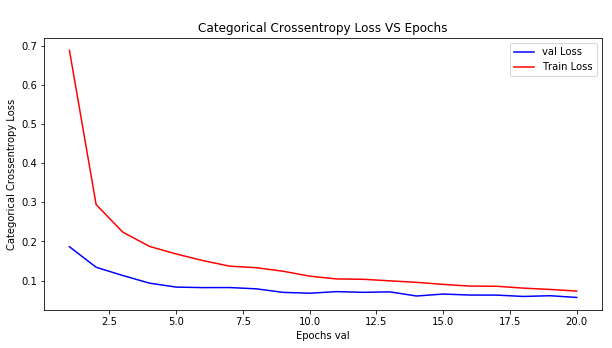

Test score: 0.05717137544195284
Test accuracy: 0.9834


In [19]:
x = list(range(1,nb_epoch+1))

# getting Val loss
vy = history3dn.history['val_loss']
# getting Train loss
ty = history3dn.history['loss']

# function call 
plt_dynamic_model(x, vy, ty)

# Evaluating the model
model_score = model3dn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving train and test accuracy of the model
model3dn_test_acc = model_score[1]
model3dn_train_acc = history3dn.history['acc']

## 3. Softmax classifier with 5-hidden layers without dropout and Batch Normalization

In [11]:
model5 = Sequential()

model5.add(Dense(513, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model5.add(Dense(252, activation='relu', kernel_initializer=he_normal(seed=None)))
model5.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)))
model5.add(Dense(68, activation='relu', kernel_initializer=he_normal(seed=None)))
model5.add(Dense(31, activation='relu', kernel_initializer=he_normal(seed=None)))

model5.add(Dense(output_dim, activation='softmax'))
print(model5.summary())
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 513)               402705    
_________________________________________________________________
dense_15 (Dense)             (None, 252)               129528    
_________________________________________________________________
dense_16 (Dense)             (None, 124)               31372     
_________________________________________________________________
dense_17 (Dense)             (None, 68)                8500      
_________________________________________________________________
dense_18 (Dense)             (None, 31)                2139      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                320       
Total params: 574,564
Trainable params: 574,564
Non-trainable params: 0
_________________________________________________________________
None

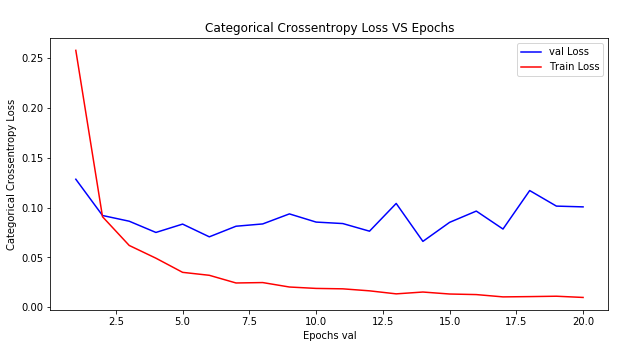

Test score: 0.10062611548545246
Test accuracy: 0.9809


In [18]:
x = list(range(1,nb_epoch+1))

# getting Val loss
vy = history5.history['val_loss']
# getting Train loss
ty = history5.history['loss']

# function call 
plt_dynamic_model(x, vy, ty)

# Evaluating the model
model_score = model5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving train and test accuracy of the model
model5_test_acc = model_score[1]
model5_train_acc = history5.history['acc']

### Softmax classifier with 5-hidden layers With Dropout and Batch Normalisation

In [12]:
model5dn = Sequential()

model5dn.add(Dense(513, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model5dn.add(BatchNormalization())
model5dn.add(Dropout(0.5))

model5dn.add(Dense(252, activation='relu', kernel_initializer=he_normal(seed=None)))
model5dn.add(BatchNormalization())
model5dn.add(Dropout(0.5))

model5dn.add(Dense(124, activation='relu', kernel_initializer=he_normal(seed=None)))
model5dn.add(BatchNormalization())
model5dn.add(Dropout(0.5))

model5dn.add(Dense(68, activation='relu', kernel_initializer=he_normal(seed=None)))
model5dn.add(BatchNormalization())
model5dn.add(Dropout(0.5))

model5dn.add(Dense(31, activation='relu', kernel_initializer=he_normal(seed=None)))
model5dn.add(BatchNormalization())
model5dn.add(Dropout(0.5))

model5dn.add(Dense(output_dim, activation='softmax'))
print(model5dn.summary())
model5dn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5dn = model5dn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 513)               402705    
_________________________________________________________________
batch_normalization_6 (Batch (None, 513)               2052      
_________________________________________________________________
dropout_6 (Dropout)          (None, 513)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 252)               129528    
_________________________________________________________________
batch_normalization_7 (Batch (None, 252)               1008      
_________________________________________________________________
dropout_7 (Dropout)          (None, 252)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 124)               31372     
__________

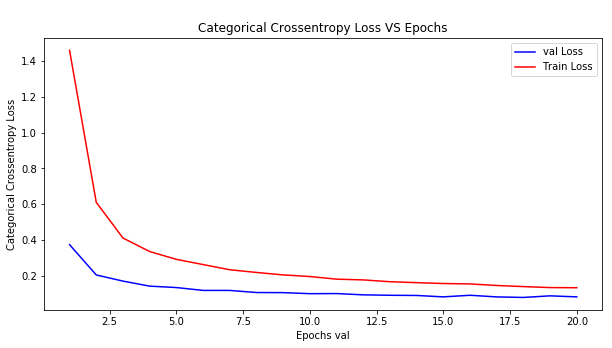

Test score: 0.0807438613414066
Test accuracy: 0.9825


In [17]:
x = list(range(1,nb_epoch+1))

# getting Val loss
vy = history5dn.history['val_loss']
# getting Train loss
ty = history5dn.history['loss']

# function call 
plt_dynamic_model(x, vy, ty)

# Evaluating the model
model_score = model5dn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving train and test accuracy of the model
model5dn_test_acc = model_score[1]
model5dn_train_acc = history5dn.history['acc']

## Conclustion 

In [30]:
from prettytable import PrettyTable

print('Performance Table')
x = PrettyTable()
x.field_names =["Models","Train","Test"]

x.add_row(["2-Layer softmax without Dropout and BN",model2_train_acc[-1],model2_test_acc])
x.add_row(["2-Layer softmax with Dropout and BN ",model2dn_train_acc[-1],model2dn_test_acc])
x.add_row(["3-Layer softmax without Dropout and BN",model3_train_acc[-1],model3_test_acc])
x.add_row(["3-Layer softmax with Dropout and BN",model3dn_train_acc[-1],model3dn_test_acc])
x.add_row(["5-Layer softmax without Dropout and BN",model5_train_acc[-1],model5_test_acc])
x.add_row(["5-Layer softmax with Dropout and BN",model5dn_train_acc[-1],model5dn_test_acc])

print(x)

Performance Table
+----------------------------------------+--------------------+--------+
|                 Models                 |       Train        |  Test  |
+----------------------------------------+--------------------+--------+
| 2-Layer softmax without Dropout and BN | 0.9967166666666667 | 0.982  |
|  2-Layer softmax with Dropout and BN   | 0.9808166666666667 | 0.9818 |
| 3-Layer softmax without Dropout and BN | 0.9972833333333333 | 0.9829 |
|  3-Layer softmax with Dropout and BN   | 0.9785833333651225 | 0.9834 |
| 5-Layer softmax without Dropout and BN | 0.9971666666666666 | 0.9809 |
|  5-Layer softmax with Dropout and BN   | 0.9703666666666667 | 0.9825 |
+----------------------------------------+--------------------+--------+
